Problem Feature:
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

1. Age ==>> Age in years

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

2. Sibsp ==>> NO of siblings / spouses aboard the Titanic
The dataset defines family relations in this way...

a. Sibling = brother, sister, stepbrother, stepsister

b. Spouse = husband, wife (mistresses and fiancés were ignored)

3. Parch ==>> The dataset defines family relations in this way...

a. Parent = mother, father

b. Child = daughter, son, stepdaughter, stepson

c. Some children travelled only with a nanny, therefore parch=0 for them.

4. Pclass ==>> A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

5. Embarked ==>> Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

6. Name ==>> Passenger Name

7. Sex ==>> Sex
8. Ticket ==>> Ticket number
9. Cabin ==>> Cabin number
10. Fare ==>> Indicating the fare paid
11. PassengerID ==>> Passenger ID
12. Survival ==>> Survival 0 = No, 1 = Yes

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [4]:
print('size of train data:',train.shape)
print('size of test data:',test.shape)

size of train data: (891, 12)
size of test data: (418, 11)


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There is a combination of datatypes present in the data: int, float and object

Categorical features: Survived, Sex, and Embarked. Ordinal: Pclass.

Continous: Age, Fare. Discrete: SibSp, Parch.

The target/dependent feature in our dataset is Survived, rest 11 fetaures are independent features

There are 12 features, looking into each of these features:

1. PassengerID: Each Passeneger was provided a unique ID. Lets see how many unique users we have in our dataset

In [7]:
train.PassengerId.value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

There are 891 unique passengers in our dataset and none of the value in this feature is null.

The feature has no impact on the outcome variable. So, it will be excluded from analysis.

1. Survived: It is the target variable.
    
The values are 0 and 1. Lets check the ratio of 0 and 1:

In [8]:
train.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [10]:
549+342

891

In [11]:
549/891

0.6161616161616161

about 62% of the people died because of the sinking of the Titanic and 38% of them survived.

1. Pclass: It is a categorical variable with 3 values: 1 class,2 class,3 class


In [12]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Majority of the people travelled belonged to the 3rd class

1. Name: Name feature is used to describe a name including titles, round brackets,and quotes used for alternative or short names.

In [13]:
print("Unique values:",train.Name.nunique())

print('\n Sample values present:\n',train.Name.value_counts())

Unique values: 891

 Sample values present:
 Rood, Mr. Hugh Roscoe              1
Dean, Master. Bertram Vere         1
Navratil, Master. Edmond Roger     1
Landergren, Miss. Aurora Adelia    1
Windelov, Mr. Einar                1
                                  ..
Hakkarainen, Mr. Pekka Pietari     1
Fynney, Mr. Joseph J               1
Garside, Miss. Ethel               1
Newell, Miss. Madeleine            1
Mellors, Mr. William John          1
Name: Name, Length: 891, dtype: int64


There are 891 unique values present in here, which are as such of no use but we extract information from the same make generate new features.


1. Sex: Sex is a categorical variables with 2 categries: Male and Female.


In [14]:
train.Sex.value_counts()


male      577
female    314
Name: Sex, dtype: int64

The male travelled were almost twice the number of females.

1. Age: Age is a numerical feature.


In [15]:
print("Age varies from: ",train.Age.min(),'yrs to',train.Age.max(),'yrs')


Age varies from:  0.42 yrs to 80.0 yrs


1. SibSp: The no of siblings/spouse that travelled with a person.


In [16]:
train.SibSp.value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

1. Parch: The no of parents/children that travelled with a person.


In [17]:
train.Parch.value_counts()


0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

1. Ticket: The ticket no allocated to each person. Ticket is a mix of numeric and alphanumeric data types and contains duplicate values.


In [18]:
train.Ticket.value_counts()


1601                 7
CA. 2343             7
347082               7
347088               6
CA 2144              6
                    ..
PC 17473             1
STON/O 2. 3101293    1
A4. 54510            1
347078               1
28134                1
Name: Ticket, Length: 681, dtype: int64

There are some missing values present in this feature.


1. Fare: The amount paid by each passeneger.


In [19]:
print("Fare varies from: ",train.Fare.min(),'to',train.Fare.max())


Fare varies from:  0.0 to 512.3292


1. Cabin: Cabin numbers are stored in this feature ,some cabin numbers are repeated as the same cabin can be shared among the passenegers belonging to the same family, null values values are also present in this feature. Cabin is alphanumeric.


In [20]:
train.Cabin.value_counts()


B96 B98        4
C23 C25 C27    4
G6             4
F2             3
C22 C26        3
              ..
C86            1
C110           1
C50            1
D47            1
C104           1
Name: Cabin, Length: 147, dtype: int64

1. Embarked : Embarked is a categorical variables with 3 categries: C(Cherbourg), Q(Queenstown) and S(Southampton)


In [22]:
train.Embarked.value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

# EDA

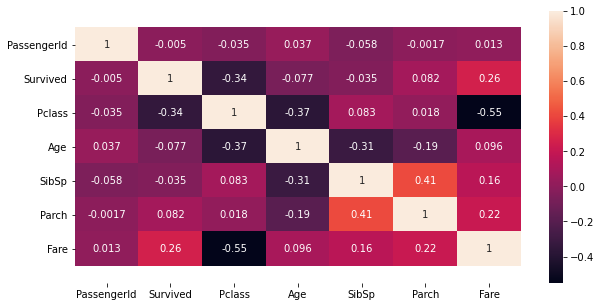

In [23]:
# Correlation matrix between numerical values

plt.figure(figsize=(10, 5))
cor = train.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Only Fare feature seems to have a significative correlation with the survival probability.



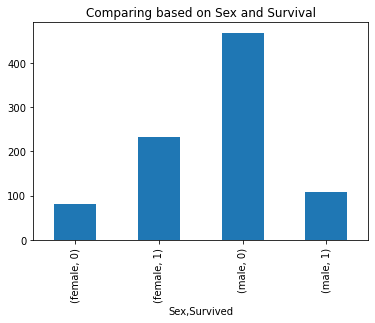

Sex
female    68.128655
male      31.871345
Name: Pclass, dtype: float64

In [24]:
#A bar plot of survival by sex
train.groupby(['Sex', 'Survived'])['Pclass'].count().plot(kind = 'bar')
plt.title('Comparing based on Sex and Survival')
plt.show()

#percentages of females vs. males that survive
d = train[train['Survived'] == 1].groupby('Sex').count()['Pclass']
(d / d.sum()) * 100

The number of males present in our data is more than the females present still the number of females survived are more than males.

Survived feamles are 68% where as the survied males account for just 32%.

C:\Users\Arvind Sain\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Arvind Sain\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


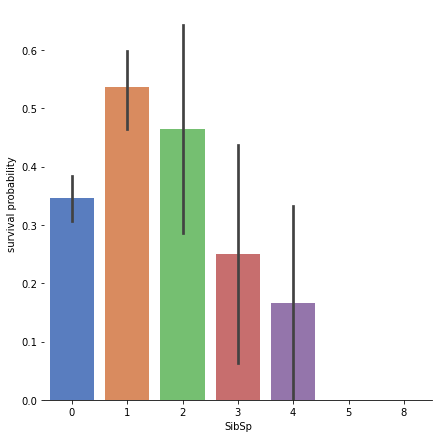

In [25]:
#SibSp feature vs Survived

g = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive

Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive

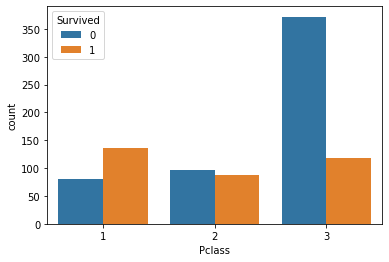

1    39.766082
3    34.795322
2    25.438596
Name: Pclass, dtype: float64

In [27]:
# Passengers from which class survived the most?

sns.countplot(x = 'Pclass', hue = 'Survived', data = train)
plt.show()

#print percentages of 1st vs. 2nd and 3rd class
train[train['Survived'] == 1]['Pclass'].value_counts(normalize = True) * 100

Most of the people survived are from PClass 1 which is around 40% of the survival rate followed by PClass 3, then PClass 2.

Majority of the passengers in our dataset belong to Pclass 3.

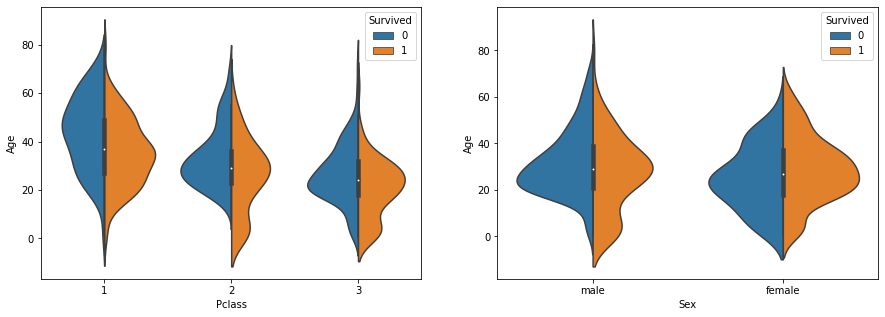

In [29]:
#Pclass vs. Age sliced by Survived

# create subplot plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# create violinplot plot using groupby
sns.violinplot(x = 'Pclass', y = 'Age', data = train, hue = 'Survived', split = True, ax = axes[0])
sns.violinplot(x = 'Sex', y = 'Age', data = train, hue = 'Survived', split = True, ax = axes[1])
plt.show()

In PClass 1, the spread of age is more. And sex wise, spread of age is more in males. Highest number of deaths are from males and from Pclass 3.

Maximum males died were of age between 20-30 years.

Maximum females survived were of age between 20-40 years.

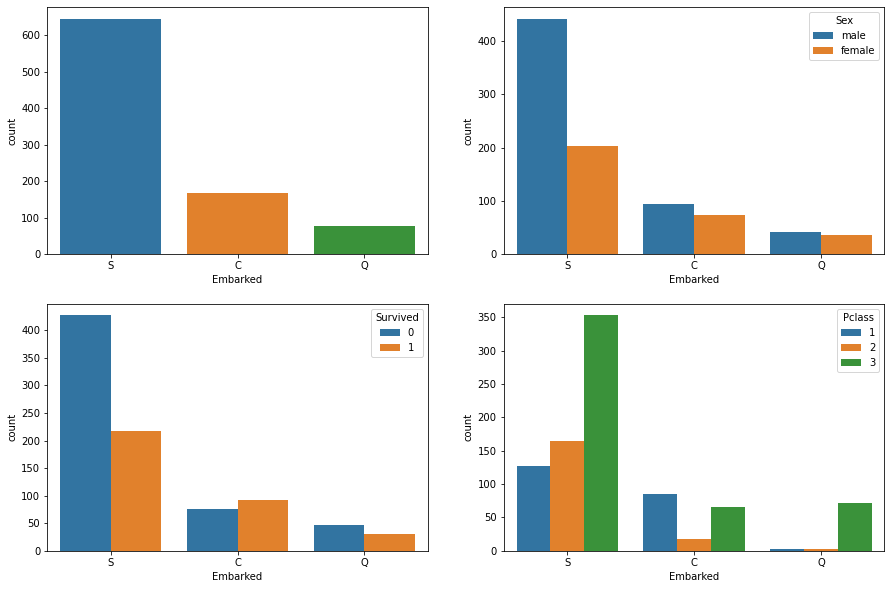

In [30]:
#Embarked vs (No. of passengers, sex, Survived , Pclass)

# create subplot plot
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

# create Bar (count) plot for Embarked vs. No. Of Passengers Boarded
sns.countplot(x = 'Embarked', data = train, ax = axes[0,0])

# create Bar (count) plot for Embarked vs. Male-Female Split
sns.countplot(x = 'Embarked', hue = 'Sex', data = train, ax = axes[0,1])

# create Bar (count) plot for Embarked vs Survived
sns.countplot(x = 'Embarked', hue = 'Survived', data = train, ax = axes[1,0])

# create Bar (count) plot for Embarked vs Pclass
sns.countplot(x = 'Embarked', hue = 'Pclass', data = train, ax = axes[1,1])
plt.show()

Maximum people embarked from Southampton.

The count of males embarked are more from each region.

Maximum people died are from Southampton and maximum number of people who survied are females who embarked from Southampton.

Maximum people embarked from Southampton are from Pclass 3.

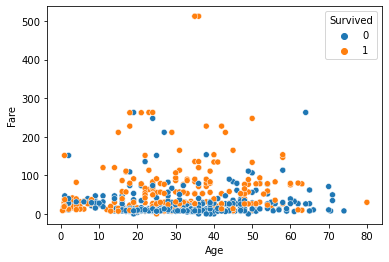

In [31]:
#age v/s fare with target variable(Survived)

sns.scatterplot(x = train['Age'], y = train['Fare'], hue = train['Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

The people who survived had paid more fare and the spread of age is even for both who survived and who died.

# Data preprocessing


In [32]:
# lets combine the data for data prep

test['Survived']=np.nan
train['data']='train'
test['data']='test'
test=test[train.columns]

combined = pd.concat([train,test], sort = False , ignore_index= True)

In [33]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [34]:
# Extracting relevant information from the Name feature and creating a new feature Title

combined['Name'][0].split(',')[1].split('.')[0]

' Mr'

In [35]:
combined['Name'].size


1309

In [36]:
lst = []

for i in range(0,combined['Name'].size):
    a = combined['Name'][i].split(',')[1].split('.')[0]
    lst.append(a)

In [37]:
combined['Title'] = lst


In [38]:
combined.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr


In [39]:
combined['Title'].nunique()


18

Now the feature Title has been converted into a categorical feature with 18 different categories



In [40]:
combined.Title.value_counts()


 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Major             2
 Mlle              2
 Ms                2
 Mme               1
 Dona              1
 Capt              1
 Lady              1
 the Countess      1
 Jonkheer          1
 Sir               1
 Don               1
Name: Title, dtype: int64

Reducing the number of features by removing the less occuring titles with Others



In [41]:
titles_ignore = [' Dona',' Don', ' Rev', ' Dr', ' Mme',' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',' the Countess', ' Jonkheer']


In [42]:
def title_change(x):
    if x in titles_ignore:
        return("Others")
    else:
        return(x)
    
combined.Title.apply(title_change).unique()

combined['Title'] = combined.Title.apply(title_change)

combined['Title'] = combined['Title'].str.replace('Ms', 'Miss')

In [43]:
combined.Title.value_counts()


 Mr        757
 Miss      262
 Mrs       197
 Master     61
Others      32
Name: Title, dtype: int64

In [44]:
combined.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr


In [45]:
# creating another feature "family" from "SibSp" and "Parch"

combined['Family'] = combined['SibSp']+combined['Parch']+1

In [46]:
def familycat(x):
    if(x>4):
        return('Large')
    elif(x>=2):
        return("Small")
    else:
        return("Singles")

In [47]:
combined['Family_Category'] = combined.Family.apply(familycat)

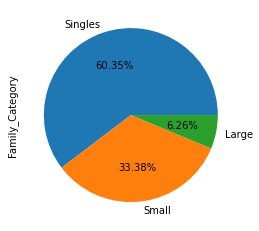

In [48]:
combined.Family_Category.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [49]:
combined.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data,Title,Family,Family_Category
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr,2,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs,2,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss,1,Singles
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs,2,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr,1,Singles


In [50]:
#Missing values

combined.isna().sum()

PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                 263
SibSp                 0
Parch                 0
Ticket                0
Fare                  1
Cabin              1014
Embarked              2
data                  0
Title                 0
Family                0
Family_Category       0
dtype: int64

In the cabin feature there are 1014 null values out of the 1309 values i.e 77% of the values are null.So we can drop the feature



In [51]:
combined.drop('Cabin',axis=1,inplace= True)


In [52]:
#Filling the missing values in age

combined['age_bins'] = pd.cut(x=combined['Age'], bins=[0,13,19,40,60,80])

In [53]:
a = combined.groupby('age_bins').count()['Age']
print('Frequency distribution of the customers: \n',a)

Frequency distribution of the customers: 
 age_bins
(0, 13]      99
(13, 19]    126
(19, 40]    594
(40, 60]    194
(60, 80]     33
Name: Age, dtype: int64


In [54]:
print('Median values:',combined.groupby('Title').median()['Age'])
print('\n Mean values:',combined.groupby('Title').mean()['Age'])

Median values: Title
 Master     4.0
 Miss      22.0
 Mr        29.0
 Mrs       35.5
Others     45.0
Name: Age, dtype: float64

 Mean values: Title
 Master     5.482642
 Miss      21.803744
 Mr        32.252151
 Mrs       36.994118
Others     43.129032
Name: Age, dtype: float64


In [55]:
#Filling the null values in the Age feature based on the mean age of each of the title

def impute_age(cols):
    Age = cols[0]
    Title = cols[1]
    
    if pd.isnull(Age):
        
        if Title == 'Master':
            return 5
        elif Title == 'Miss':
            return 22
        elif Title == 'Mr':
            return 32
        elif Title == 'Mrs':
            return 37
        elif Title == 'Ms':
            return 28
        else:
            return 43
    else:
        return Age

combined['Age']=combined[['Age','Title']].apply(impute_age,axis=1)

combined.Age.isnull().sum()

0

In [56]:
combined.isna().sum()


PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 1
Embarked             2
data                 0
Title                0
Family               0
Family_Category      0
age_bins           263
dtype: int64

In [57]:
#Missing value in Fare

combined[combined['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,data,Title,Family,Family_Category,age_bins
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,test,Mr,1,Singles,"(60, 80]"


The passenger whose fare value is missing is travelling in pclass 3, from the heatmap we could clearly see that fare is highly correlated to Pclass

So filling the fare values based on the average fare of a person belonging to Pclass 3

In [58]:
combined.groupby('Pclass').mean()['Fare']


Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [59]:
combined.Fare.fillna(value=13.30,inplace=True)


In [60]:
#missing values in Embarked

#As we saw that maximum passengers boarded from Port S, we replace NaN with S.

combined.Embarked.fillna(value='S',inplace=True)

In [61]:
combined.isna().sum()


PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
data                 0
Title                0
Family               0
Family_Category      0
age_bins           263
dtype: int64

# Dropping UnNeeded Features:

Name,Ticket,PassengerId,age_bins,Family,Sibsp,Parch beacuse these features either contain unique values or new features have been created using them

In [63]:
combined.drop(['Name','Ticket','age_bins','Family','SibSp','Parch'],axis=1,inplace=True)

In [64]:
combined.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,data,Title,Family_Category
0,1,0.0,3,male,22.0,7.2500,S,train,Mr,Small
1,2,1.0,1,female,38.0,71.2833,C,train,Mrs,Small
2,3,1.0,3,female,26.0,7.9250,S,train,Miss,Singles
3,4,1.0,1,female,35.0,53.1000,S,train,Mrs,Small
4,5,0.0,3,male,35.0,8.0500,S,train,Mr,Singles


In [65]:
#Encoding String Values to Numeric values

combined = pd.get_dummies(combined,columns=['Sex','Embarked','Title','Family_Category'],drop_first = True)

In [66]:
combined.head()


,PassengerId,Survived,Pclass,Age,Fare,data,Sex_male,Embarked_Q,Embarked_S,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Others,Family_Category_Singles,Family_Category_Small
0,1,0.0,3,22.0,7.2500,train,1,0,1,0,1,0,0,0,1
1,2,1.0,1,38.0,71.2833,train,0,0,0,0,0,1,0,0,1
2,3,1.0,3,26.0,7.9250,train,0,0,1,1,0,0,0,1,0
3,4,1.0,1,35.0,53.1000,train,0,0,1,0,0,1,0,0,1
4,5,0.0,3,35.0,8.0500,train,1,0,1,0,1,0,0,1,0


In [67]:
combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              1309 non-null   int64  
 1   Survived                 891 non-null    float64
 2   Pclass                   1309 non-null   int64  
 3   Age                      1309 non-null   float64
 4   Fare                     1309 non-null   float64
 5   data                     1309 non-null   object 
 6   Sex_male                 1309 non-null   uint8  
 7   Embarked_Q               1309 non-null   uint8  
 8   Embarked_S               1309 non-null   uint8  
 9   Title_ Miss              1309 non-null   uint8  
 10  Title_ Mr                1309 non-null   uint8  
 11  Title_ Mrs               1309 non-null   uint8  
 12  Title_Others             1309 non-null   uint8  
 13  Family_Category_Singles  1309 non-null   uint8  
 14  Family_Category_Small   

In [68]:
#splitting the data back into train and test as it was already provided

train = combined[combined['data']=='train']
train.drop(['data','PassengerId'],axis=1,inplace=True)

test = combined[combined['data']=='test']
submit = test['PassengerId']
test.drop(['Survived','data','PassengerId'],axis=1,inplace=True)

del combined

C:\Users\Arvind Sain\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
#For submission

submission = pd.DataFrame()
submission['PassengerId'] = submit
submission['Survived'] = np.nan

# Model building

In [70]:
train["Survived"] = train["Survived"].astype(int)

y = train["Survived"]
X = train.drop(labels = ["Survived"],axis = 1)

#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [71]:
#scaling the data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report

In [73]:
lr = LogisticRegression(solver='liblinear',random_state=3)
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)

print('Accuracy_score:',accuracy_score(y_test,y_test_pred))

Accuracy_score: 0.8246268656716418


In [74]:
#OR 
#CV
from sklearn import model_selection

scoresdt = model_selection.cross_val_score(lr, X_train, y_train, cv=10)
print(scoresdt)

print('\n The mean score we got from 10-Fold CV:',np.mean(scoresdt))

[0.80952381 0.84126984 0.80952381 0.80645161 0.83870968 0.80645161
 0.80645161 0.82258065 0.85483871 0.88709677]

 The mean score we got from 10-Fold CV: 0.8282898105478751


Accuracy is out of all the classes, how much we predicted correctly.

Accuracy is a great measure but only when you have symmetric datasets.In this dataset the target variable is imbalanced so looking into the classification report

In [75]:
#Classification Report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       168
           1       0.76      0.77      0.77       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



Precision: Out of all the positive classes we have predicted correctly, how many are actually positive.

Recall: Out of all the positive classes, how much we predicted correctly. It should be high as possible.

F-measure: It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

AUC Score

In [76]:
y_test_prob = lr.predict_proba(X_test)[:,1]

print('AUC:',roc_auc_score(y_test,y_test_prob))

AUC: 0.8822619047619048


AUC curve

True Positive Rate / Recall: TPR tells us what proportion of the positive class got correctly classified.

False Positive Rate: FPR tells us what proportion of the negative class got incorrectly classified by the classifier.

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.

In [77]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob) #thresholds here are the cutoffs


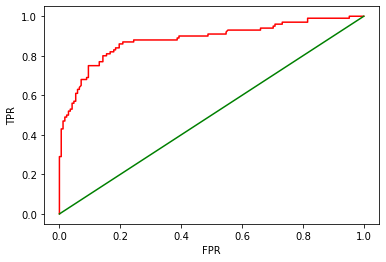

In [78]:
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [79]:
#Other Classification models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [80]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
er = ExtraTreesClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()

In [81]:
#CV

seed = 7

models = []

models.append(('Losgistic Regression', lr))
models.append(('Random Forest', rf))
models.append(('KNN', knn))
models.append(('Decision Tree', dt))
models.append(('Gaussian', gnb))
models.append(('ExtraTreesRegressor', er))
models.append(('XGBRegressor', xgb))
models.append(('LGBMRegressor', lgb))

In [87]:
#Cross validation and accuracy score comparision of various models

from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=0)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

Losgistic Regression: 0.823783 
Random Forest: 0.813708 
KNN: 0.716080 
Decision Tree: 0.785630 
Gaussian: 0.773308 
ExtraTreesRegressor: 0.792372 
XGBRegressor: 0.819351 
LGBMRegressor: 0.822659 


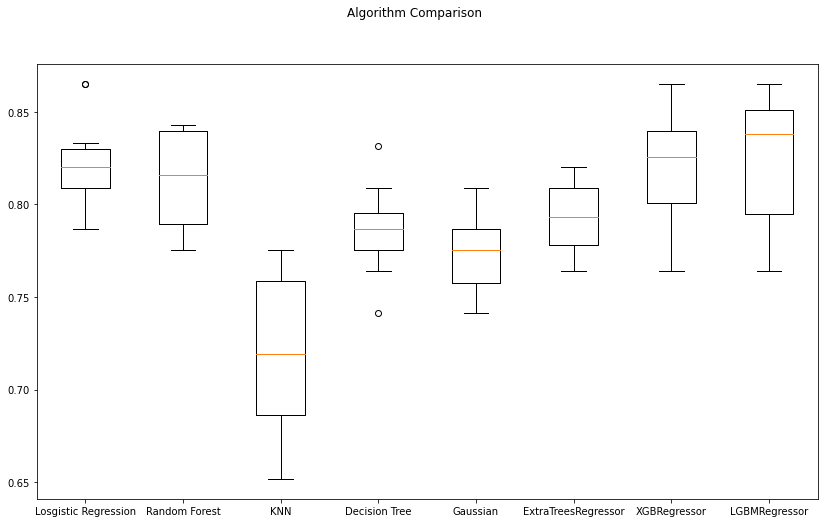

In [88]:
#Boxplot for algorithm comparision

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Conclusion :


The best rmse score for the test data on titanic dataset prediction was given by a simple Logistic Regression model.